In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from collections import namedtuple

# Information about the Box
Each box has 4 attribute ($x_1,y_1,x_2,y_2$)
* The ($x_1,y_1$) portion is coordinate at the top left conner
* The ($x_2,y_2$) portion is coordinate at the bottom right conner

In [2]:
def calcualte_intersection_over_unit(boxA,boxB):
    x_top_left=max(boxA[0],boxB[0])
    y_top_left=max(boxA[1],boxB[1])
    x_right_bottom=min(boxA[2],boxB[2])
    y_right_bottom=min(boxA[3],boxB[3])
    
    intersection_area=max(0,x_right_bottom-x_top_left+1)*max(0,y_right_bottom-y_top_left+1)
    
    boxA_area=(boxA[2]-boxA[0]+1)*(boxA[3]-boxA[1]+1)
    boxB_area=(boxB[2]-boxB[0]+1)*(boxB[3]-boxB[1]+1)
    IOU=intersection_area/(boxA_area+boxB_area-intersection_area)
    return IOU


In [3]:
Detection=namedtuple("Detection",["image_path","ground_truth","predict_bounding_box"])
example=[Detection("1.jpg", [39, 63, 203, 112], [54, 66, 198, 114]),
	Detection("2.jpg", [49, 75, 203, 125], [42, 78, 186, 126]),
	Detection("3.jpg", [31, 69, 201, 125], [18, 63, 235, 135]),
	Detection("4.jpg", [50, 72, 197, 121], [54, 72, 198, 120]),
	Detection("5.jpg", [35, 51, 196, 110], [36, 60, 180, 108])]

1.jpg, IOU: 0.7980093676814989
2.jpg, IOU: 0.7898879084187932
3.jpg, IOU: 0.6124795777303004
4.jpg, IOU: 0.9472412404349577
5.jpg, IOU: 0.7309670781893004


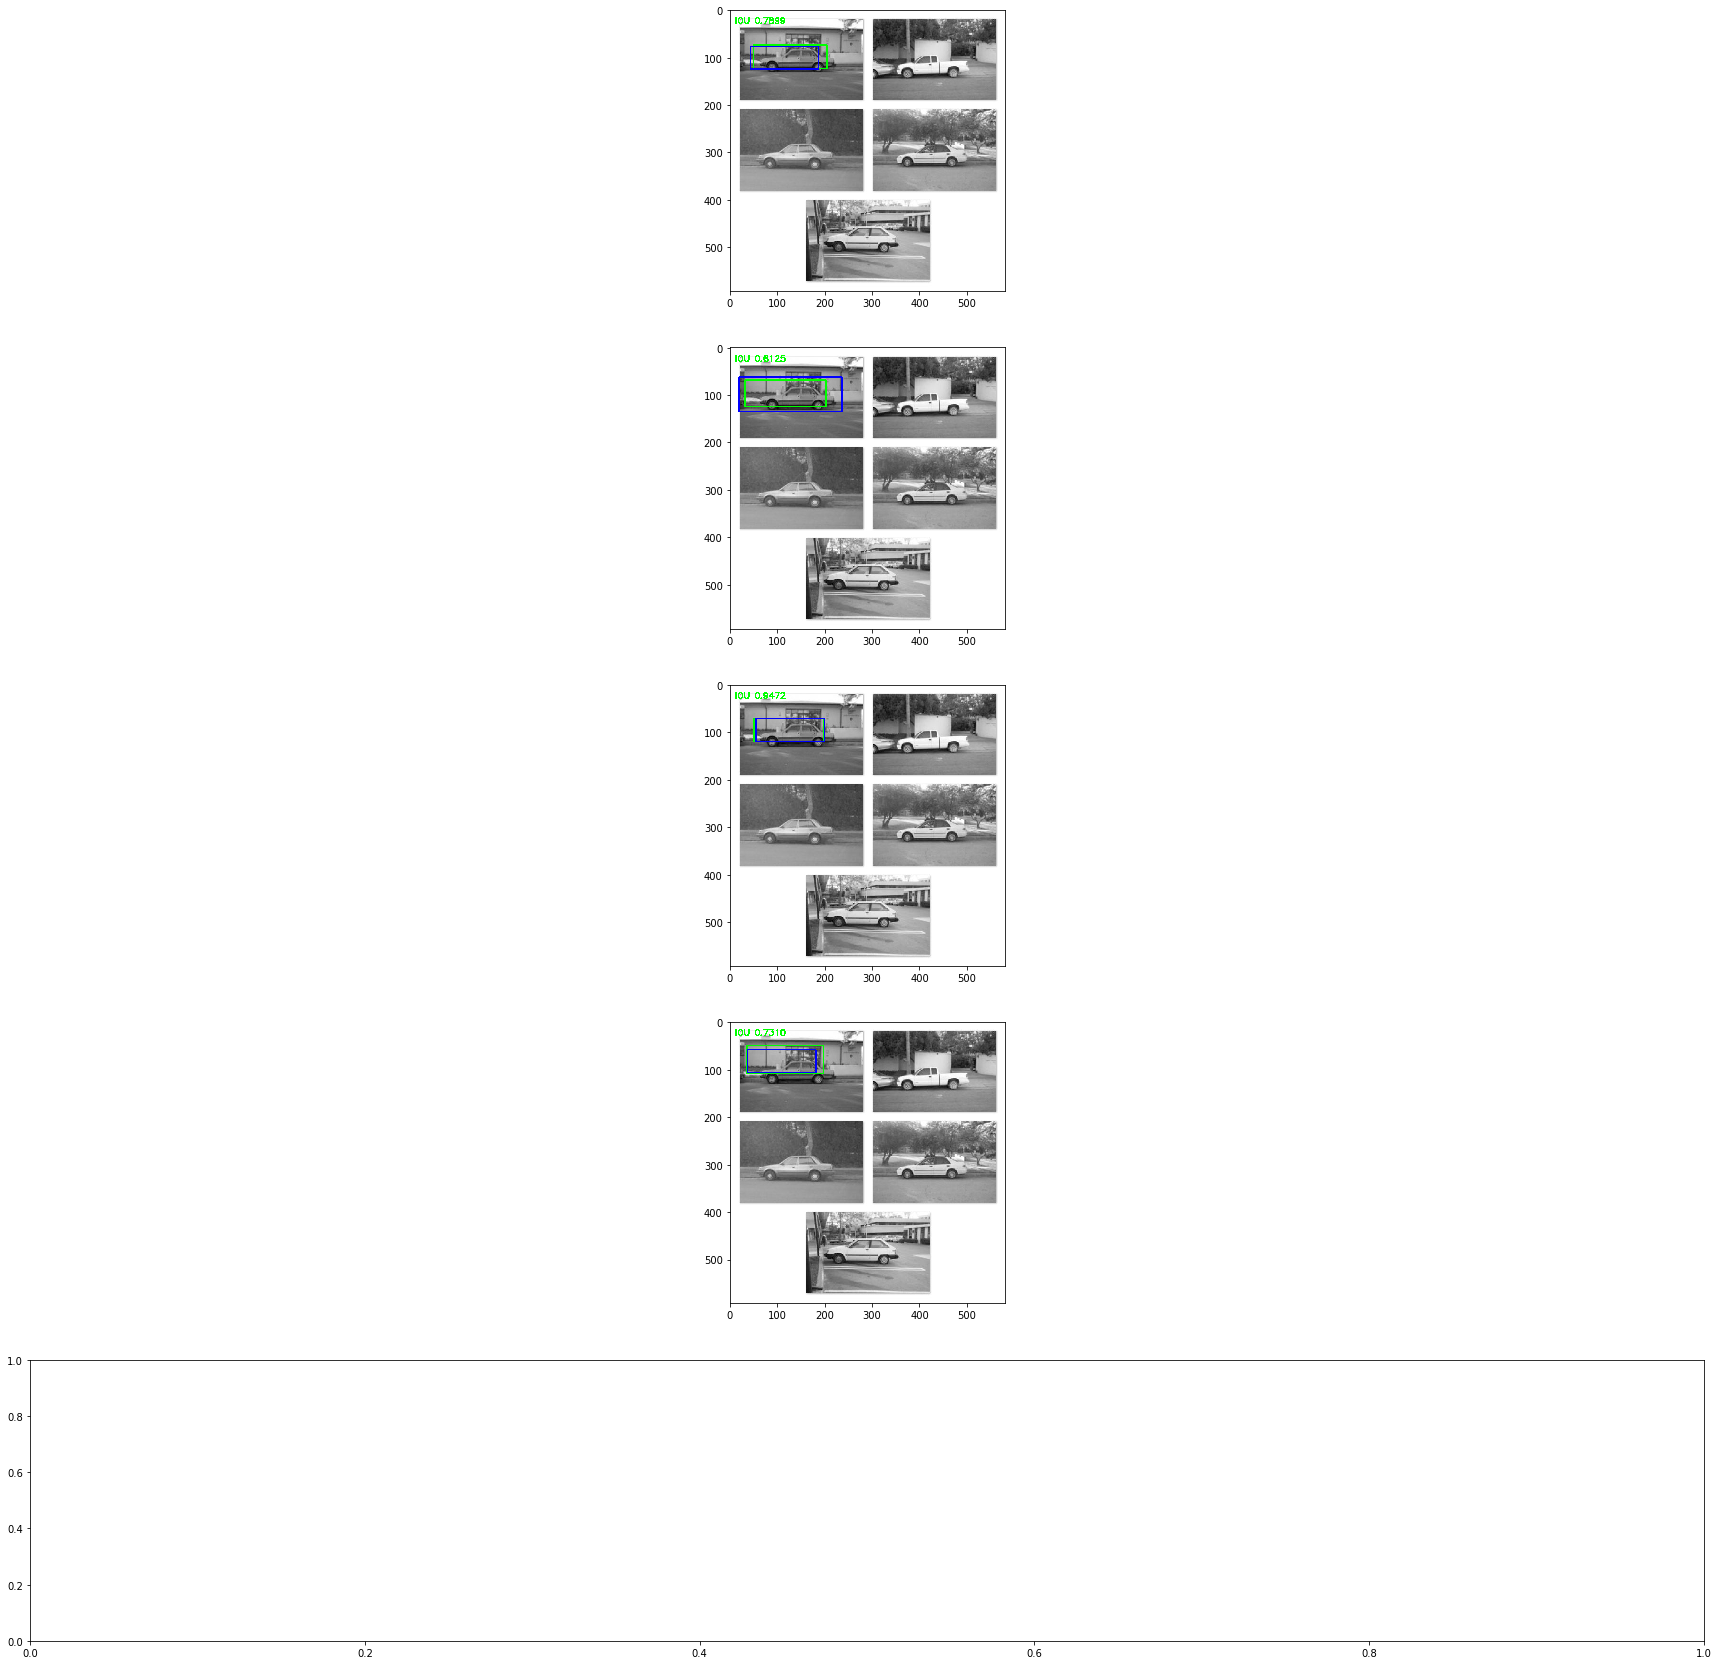

In [7]:
fig=plt.subplots(figsize=(30,30))

for i,detection in enumerate(example):
    image=cv2.imread(detection.image_path)
    cv2.rectangle(image,tuple(detection.ground_truth[:2]),tuple(detection.ground_truth[2:]),
                 (0, 255, 0),2)
    
    cv2.rectangle(image,tuple(detection.predict_bounding_box[:2]),tuple(detection.predict_bounding_box[2:]),
                 (0,0,255),2)
    
    iou=calcualte_intersection_over_unit(detection.ground_truth,detection.predict_bounding_box)
    cv2.putText(image,"IOU {:.4f}".format(iou),(10,30),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,255,0),2)
    print(detection.image_path+", IOU:",iou)
    plt.imshow(image)
    plt.subplot(5,1,i+1)  

    
plt.show()